In [2]:
import numpy as np

# Definimos la matriz de transición no homogénea
def transition_matrix(s,t):
    """
    Matriz de transición no homogénea para el sistema de dos estados
    """
    if s==0:
        if t <= 30:
            math.exp(t)
        

# Definimos el vector de estado inicial
state = np.array([0.25, 0.75])

# Simulamos el proceso de Markov no homogéneo
for t in range(365):
    p = transition_matrix(t)
    state = np.dot(p, state)
    print("Estado en el día", t+1, ":", state)

Estado en el día 1 : [0.5 0.5]
Estado en el día 2 : [0.5 0.5]
Estado en el día 3 : [0.5 0.5]
Estado en el día 4 : [0.5 0.5]
Estado en el día 5 : [0.5 0.5]
Estado en el día 6 : [0.5 0.5]
Estado en el día 7 : [0.5 0.5]
Estado en el día 8 : [0.5 0.5]
Estado en el día 9 : [0.5 0.5]
Estado en el día 10 : [0.5 0.5]
Estado en el día 11 : [0.5 0.5]
Estado en el día 12 : [0.5 0.5]
Estado en el día 13 : [0.5 0.5]
Estado en el día 14 : [0.5 0.5]
Estado en el día 15 : [0.5 0.5]
Estado en el día 16 : [0.5 0.5]
Estado en el día 17 : [0.5 0.5]
Estado en el día 18 : [0.5 0.5]
Estado en el día 19 : [0.5 0.5]
Estado en el día 20 : [0.5 0.5]
Estado en el día 21 : [0.5 0.5]
Estado en el día 22 : [0.5 0.5]
Estado en el día 23 : [0.5 0.5]
Estado en el día 24 : [0.5 0.5]
Estado en el día 25 : [0.5 0.5]
Estado en el día 26 : [0.5 0.5]
Estado en el día 27 : [0.5 0.5]
Estado en el día 28 : [0.5 0.5]
Estado en el día 29 : [0.5 0.5]
Estado en el día 30 : [0.5 0.5]
Estado en el día 31 : [0.5 0.5]
Estado en el día 

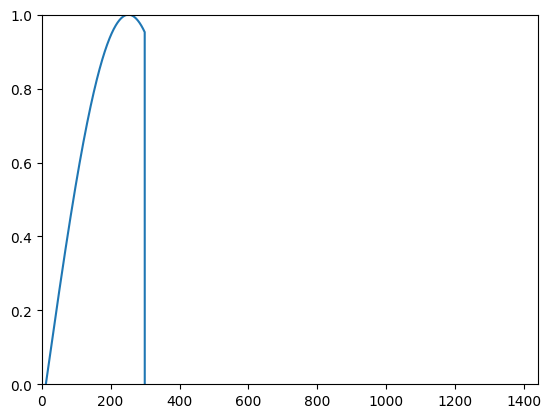

In [52]:
import math
import random
import matplotlib.pyplot as plt 

fase = random.random()
def f(t):
    if t<300:
        return np.sin((3*np.pi * t/1440)-fase)
    else:
        return -math.log(t)

plt.plot(list(range(1441)),[f(x) for x in range(1441)])
plt.ylim(0, 1)
plt.xlim(0, 1440)
plt.show()

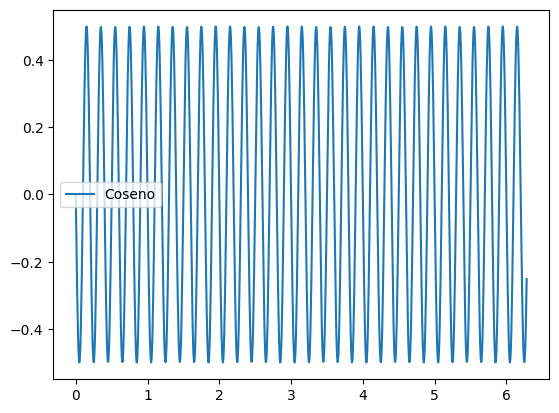

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros de la señal
amplitud_sin = 1
frecuencia_sin = 10
fase_sin = np.pi/4

amplitud_cos = 0.5
frecuencia_cos = 5
fase_cos = np.pi/2

# Definimos el intervalo de tiempo
t = np.linspace(0, 2*np.pi, 1000)

# Creamos la señal
seno = amplitud_sin * np.sin(2*np.pi*frecuencia_sin*t + fase_sin)
coseno = amplitud_cos * np.cos(2*np.pi*frecuencia_cos*t + fase_cos)
senal = seno + coseno

# Graficamos la señal
#plt.plot(t, seno, label='Seno')
plt.plot(t, coseno, label='Coseno')
#plt.plot(t, senal, label='Señal')
plt.legend()
plt.show()

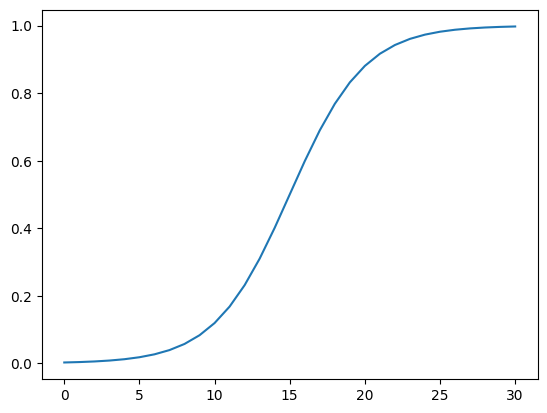

In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

L = 6
Q = 1/3*1440
x = lambda z:(2*6*z)/(5*L)-6

z = list(range(2*L+1))
zz = list(range(5*L+1))
y = [1/(1+math.exp(-x(i))) for i in zz]

def matriz_transition(t,s):
    if s==0:
        if                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             t<=30:
            p = y[t]
        else:
            p = y[-1]

plt.plot(zz,y)

ValueError: x and y must have same first dimension, but have shapes (2881,) and (10081,)

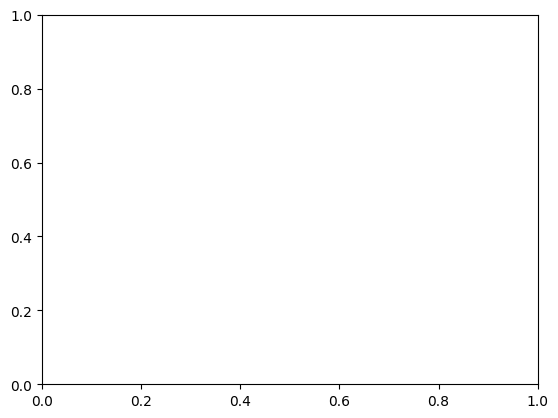

In [6]:
import math
import numpy as np
import random as rand
import matplotlib.pyplot as plt

L = 100
Q = 500
P = 1440
days = 7

def probability(t,L,P):
    if t <= L:
        return 1/(1+math.exp(-12*t/L+6))
    elif t<= P:
        return 1
    else:
        return None

def transition(s,t,L1,L2,P):
    p = 0.0
    t = t%P
    if s==0:
        p = probability(t,L1,P)
    elif s==1:
        p = 1 - probability(P-t,L2,P)
    elif s == 2 and t == P-1:
        p = 1.0
    r = rand.random()
    if r <= p:
        return (s+1)%3,True
    return s,False


def server(days):
    s,t_on = 0,0
    X = [x for x in range(days*P+1)]
    Y = []
    symbols = [0,1,0]
    for t in X:
        s,b = transition(s,t,L,P-(t_on+Q),P)
        if b:
            t_on = t%P
        Y.append(symbols[s])
    return Y

servers = []
NServers = 100
for i in range(NServers):
    servers.append(server(7)) 

servers = np.array(servers)
# Y = servers[:,:1440].sum(axis=0)
Y = servers.sum(axis=0)

# plt.xticks(np.arange(0, 1440*7-1, 1440))
plt.plot(range(days*P+1),Y)
plt.show()

In [55]:
1440*7

10080

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

C = lambda t: math.cos(t*2*math.pi/P)
S = lambda t: math.sin(t*2*math.pi/P)
X =  np.array([[C(t),S(t)] for t in range(T+1)])

model = LogisticRegression(solver='liblinear', random_state=0)
print(X.shape)
model.fit(X,Y)
print(model.classes_)
print(model.intercept_)
print(model.coef_)

(129601, 2)


ValueError: Found input variables with inconsistent numbers of samples: [129601, 129602]

(43200, 2)
[0 1]
[5.62284291]
[[-9.08855477 -0.59578005]]


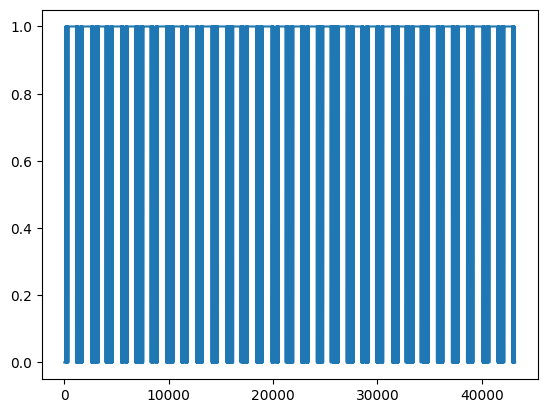

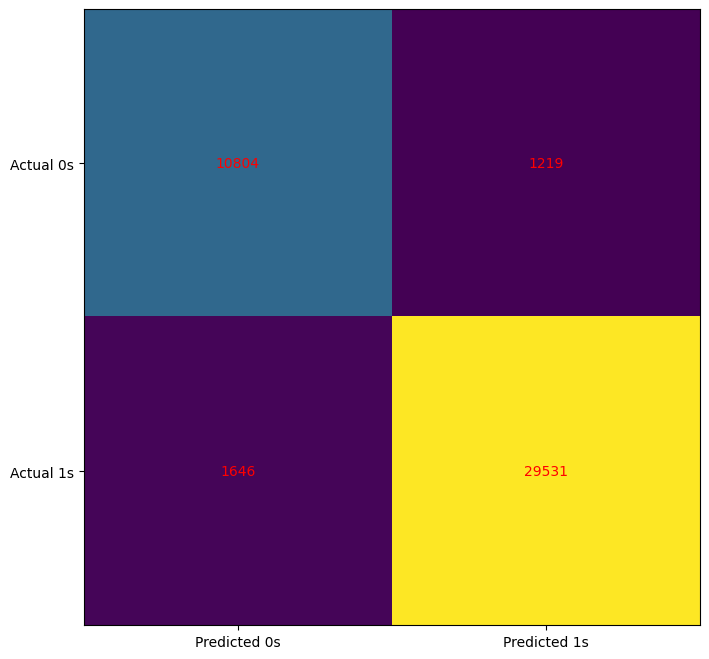

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     12023
           1       0.96      0.95      0.95     31177

    accuracy                           0.93     43200
   macro avg       0.91      0.92      0.92     43200
weighted avg       0.93      0.93      0.93     43200



In [47]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("fog_computing_1_2_1_output_.txt")

Y = np.array(df[df["server_id"]==0]["on/off"])

P = 1440
days = 30
C = lambda t: math.cos(t*2*math.pi/P)
S = lambda t: math.sin(t*2*math.pi/P)
X =  np.array([[C(t),S(t)] for t in range(days*P)])

plt.plot(range(days*P),Y[:P*days])

model = LogisticRegression(solver='liblinear', random_state=0)
print(X.shape)
model.fit(X,Y)
print(model.classes_)
print(model.intercept_)
print(model.coef_)

model.predict_proba(X)

model.score(X, Y)
cm = confusion_matrix(Y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(Y, model.predict(X)))